In [110]:
import pandas as pd
import os
from PIL import Image
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
import numpy as np
# set up jupyter-notebook
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
path = os.getcwd()
path = '{}/ds/00001'.format(path)
files = os.listdir(path)
images = [f for f in files if f[-3:] == 'bmp']
print(images)

['img_00029.bmp', 'img_00001.bmp', 'img_00015.bmp', 'img_00014.bmp', 'img_00028.bmp', 'img_00016.bmp', 'img_00002.bmp', 'img_00003.bmp', 'img_00017.bmp', 'img_00013.bmp', 'img_00007.bmp', 'img_00006.bmp', 'img_00012.bmp', 'img_00004.bmp', 'img_00010.bmp', 'img_00011.bmp', 'img_00005.bmp', 'img_00008.bmp', 'img_00020.bmp', 'img_00021.bmp', 'img_00009.bmp', 'img_00023.bmp', 'img_00022.bmp', 'img_00026.bmp', 'img_00027.bmp', 'img_00025.bmp', 'img_00031.bmp', 'img_00019.bmp', 'img_00018.bmp', 'img_00030.bmp', 'img_00024.bmp']


BMP
L
(360, 240)
Object <PIL.BmpImagePlugin.BmpImageFile image mode=L size=360x240 at 0x1292B3B50>
--------------------------------------------------------
uint8
(240, 360)
[[ 0  0 14 ...  0  9  3]
 [ 3 30 83 ...  8  6  0]
 [ 0 29 97 ... 11  1  2]
 ...
 [ 0 33 73 ...  7  9  2]
 [ 2 19 66 ...  6  8  3]
 [ 1 31 65 ...  8 11  4]]


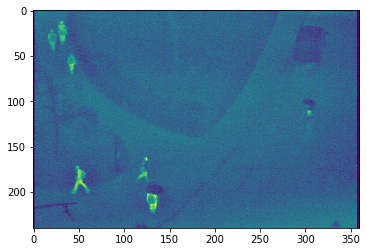

--------------------------------------------------------


In [112]:
# load the image
img = Image.open(path + '/' + images[0])
# summarize some details about the image
print(img.format)
print(img.mode)
print(img.size)
print('Object', img)
# show the image
# img.show()
print('--------------------------------------------------------')
# load image as pixel array
data = image.imread(path + '/' + images[0])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
print(data)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()
print('--------------------------------------------------------')

# # convert image to numpy array
# imageArray = asarray(img)
# # summarize shape
# print(imageArray.shape)
# # create Pillow image
# image2 = Image.fromarray(imageArray)
# # summarize image details
# print(image2.format)
# print(image2.mode)
# print(image2.size)
# print(image2)



![image-20191213182234676](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vw7mfbjwj30gw04kjrw.jpg)

![image-20191213183517749](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vwkv9mspj30hn06ymym.jpg)

In [113]:
from scipy.special import gamma
import math
def asymmetric_generalized_gaussian(x, mean, sigma_l, sigma_r, beta):
    def A(beta):
        return math.pow(gamma(3/beta)/gamma(1/beta), beta/2)
    
    coefficient = (beta * math.pow((gamma(3/beta)/gamma(1/beta)), 0.5)) / ((sigma_l + sigma_r) * gamma(1/beta))
    def f(new_x, sigma, beta):
        return coefficient * np.exp(-A(beta) * ((new_x/sigma) ** beta))
    
    
    return np.where(x - mean < 0 , f(mean - x, sigma_l, beta), f(x - mean, sigma_r, beta))
    
# x = np.array([[1,10],[4,6], [7,8]])
# m = x.mean(axis=1, keepdims=True)
# print(x)
# print(m)
# print(asymmetric_generalized_gaussian(x,m,1,2,1))

DEBUG:TestKmeanPP:[[ 4.9666907  -5.05399386]
 [-0.03398811  4.94373292]
 [-5.03428278 -5.06099388]]
DEBUG:TestKmeanPP:->begin to draw gaussian models


(300,) (300, 2) (300,)
(300,) (300, 2) (300,)


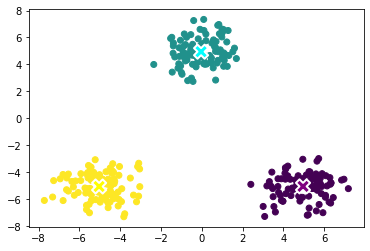

.
----------------------------------------------------------------------
Ran 1 test in 0.278s

OK


(900,) (900, 2) (900,)
(900,) (900, 2) (900,)
[[ 4.48578928  2.95891829]
 [-1.57772908 -0.38899908]
 [-2.20204546  5.48616056]]


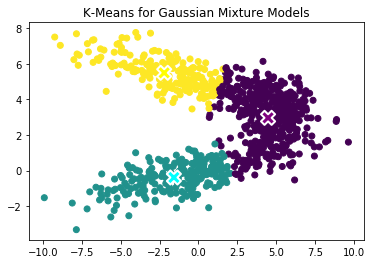

In [114]:
#import k-means
%run ../test_algorithms/test_kmean.py
n_samples = 300

# generate random sample, two cluster
np.random.seed(0)
# generate spherical data 
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([5, 3])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# the other one
stretched_shifted_gaussian = np.dot(np.random.randn(n_samples, 2), np.array([[0., -0.7], [-3.5, .7]])) + np.array([0, 5])

# concatenate the two datasets into the final training set
X = np.vstack([shifted_gaussian, stretched_gaussian, stretched_shifted_gaussian])

kpp = KMeansPP(3)
kpp.fit(X)
cluster = kpp.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(kpp.centers[:, 0], kpp.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'],
            edgecolor="white")
plt.title('K-Means for Gaussian Mixture Models')
plt.show()

In [135]:
class AGGM_EM(object):
    
    def __init__(self, centers, X):
        self.X = X
        self.cluster_num, self.dim = centers.shape
        self.mean = centers
        cov = np.std(X)
#         print(cov)
        self.sigma_l = self.sigma_r = np.array([cov for _ in range(self.cluster_num)])
        self.coef = np.ones(self.cluster_num) / 3
        self.beta = np.ones(self.cluster_num) * 2
        self.params = np.hstack(
            (self.mean.ravel(),
            self.sigma_l.ravel(),
            self.sigma_r.ravel(),
            self.beta.ravel(),
            self.coef.ravel())
        )
        self.resp = np.zeros((len(X), self.cluster_num))
#         print(self.X)
#         print(self.beta.shape)
#         print(self.mean.shape)
#         print(self.sigma_l.shape)
#         print(self.sigma_l.ravel())
#         print(self.resp)
        
    def A(self, beta):
        return math.pow(gamma(3/beta)/gamma(1/beta), beta/2)
    
    def _asymmetric_generalized_gaussian(self, x, mean, sigma_l, sigma_r, beta):
        coefficient = (beta * math.pow((gamma(3/beta)/gamma(1/beta)), 0.5)) / ((sigma_l + sigma_r) * gamma(1/beta))
        def f(new_x, sigma, beta):
            likelihood = coefficient * np.exp(-self.A(beta) * ((new_x/sigma) ** beta))
            #print('----', new_x, likelihood)
            return likelihood

        return np.where(x - mean < 0 , f(mean - x, sigma_l, beta), f(x - mean, sigma_r, beta))        
          
    
    def _e_step(self):
#         print(self.X.shape)
        for i in range(self.cluster_num):
            likelihoods = []
            for j in range(self.X.shape[0]):
                likelihood = self._asymmetric_generalized_gaussian(self.X[j], self.mean[i], self.sigma_l[i], self.sigma_r[i], self.beta[i])
                likelihoods.append(likelihood[0] * likelihood[1])
#                 print(likelihood[0] * likelihood[1], np.dot(likelihood , likelihood.T))
#                 print(i, j, likelihood)            
            
#             print(likelihoods)
#             print(np.array(likelihoods))
            self.resp[:, i] = self.coef[i] * np.array(likelihoods)
        # normalization for over all possible cluster assignments
        # resp = resp / resp.sum(axis = 1)[:,np.newaxis]
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims=True)
        print(self.resp, self.resp.shape)
    
    def _m_step(self):
        # print(self.X, self.X[0:3])
#         print('---', self.resp, self.beta.shape, self.mean.shape, self.resp[:,0])
        def f(Z, new_x, sigma, beta, debug=1):
            ret = debug * Z * new_x ** (beta - 1) / sigma ** (beta) 
#             print('in f', ret)
            return ret
        def second_f(Z, new_x, sigma, beta):
            ret = Z * new_x ** (beta - 2) / sigma ** (beta) 
            return ret
        def sigma_f(A, Z, new_x, beta, sigma):
            ret = Z * A(beta) * beta / sigma * ((new_x / sigma) ** beta)
            return ret
        
        def sigma_second_f(A, Z, new_x, beta, sigma):
            ret = Z * A(beta) * beta * (beta + 1)/ (sigma ** 2) * ((new_x / sigma) ** beta)
            return ret
        
        def beta_f():
            pass
        #################### set the parameter of mean #########################
        for i in range(self.cluster_num):
            Z = self.resp[:,i]
            Z = Z[:, np.newaxis]
            
            ret = np.where(self.X - self.mean[i] > 0, f(Z, self.X - self.mean[i], self.sigma_l[i], self.beta[i]), f(Z, self.mean[i] - self.X, self.sigma_r[i], self.beta[i], -1))
            first_derivative = self.A(self.beta[i])*self.beta[i] * np.sum(ret, axis=0)
            
            ret2 = np.where(self.X - self.mean[i] > 0, second_f(Z, self.X - self.mean[i], self.sigma_r[i], self.beta[i]), second_f(Z, self.mean[i] - self.X, self.sigma_l[i], self.beta[i]))
            second_derivative = self.A(self.beta[i])*self.beta[i]*(self.beta[i] - 1) * np.sum(ret2, axis=0)
            print('--', first_derivative, second_derivative, first_derivative / second_derivative)
            
#             self.mean[i] = self.mean[i] + first_derivative / second_derivative
        ################### set the parameter of left sigma ###################
            temp_Z = np.sum(Z/(self.sigma_l[i] + self.sigma_l[i]))
            temp_second_Z = np.sum(Z/((self.sigma_l[i] + self.sigma_l[i]) ** 2))
            
            sigma_l_first = np.sum(np.where(self.X - self.mean[i] < 0, 
                     sigma_f(self.A, Z, self.mean[i] - self.X, self.beta[i], self.sigma_l[i]), 0), axis=0)
            sigma_l_first = sigma_l_first - temp_Z
            print('sigma_l_first', sigma_l_first, temp_Z)
            
            sigma_l_second = np.where(self.X - self.mean[i] < 0, 
                                     sigma_second_f(self.A, Z, self.mean[i] - self.X, self.beta[i], self.sigma_l[i])
                                     , 0)
            sigma_l_second = np.sum(sigma_l_second, axis=0) - temp_second_Z
            print('sigma_l_second', sigma_l_second, temp_second_Z)
#             self.sigma_l[i] = self.sigma_l[i] + sigma_l_first / sigma_l_second

        ################## set the parameter of right sigma ###################
            sigma_r_first = np.sum(np.where(self.X - self.mean[i] > 0, 
                     sigma_f(self.A, Z, self.X - self.mean[i], self.beta[i], self.sigma_r[i]), 0), axis=0)
            sigma_r_first = sigma_r_first - temp_Z
            print('sigma_r_first', sigma_r_first, temp_Z)
            
            sigma_r_second = np.where(self.X - self.mean[i] > 0, 
                                     sigma_second_f(self.A, Z, self.X - self.mean[i], self.beta[i], self.sigma_r[i])
                                     , 0)
            sigma_r_second = np.sum(sigma_r_second, axis=0) - temp_second_Z
            print('sigma_r_second', sigma_r_second, temp_second_Z)
#             self.sigma_r[i] = self.sigma_r[i] + sigma_r_first / sigma_r_second

        ################## set the parameter of beta #######################
        
            break

        
    
    def em():
        self.A(self.beta)
        
# init with the standard deviation
aggm = AGGM_EM(kpp.centers, X)
aggm._e_step()
aggm._m_step()

[[0.96269577 0.01902441 0.01827982]
 [0.93610778 0.01608309 0.04780914]
 [0.95975138 0.02823775 0.01201087]
 ...
 [0.50824822 0.0968383  0.39491348]
 [0.16364844 0.16210052 0.67425105]
 [0.13027993 0.13594059 0.73377948]] (900, 3)
-- [-14.5812012   -4.55362722] [44.02954153 44.02954153] [-0.33116859 -0.10342209]
sigma_l_first [-24.85929525 -49.29292597] 69.65120951957799
sigma_l_second [31.4649736   8.29664172] 11.007385381633437
sigma_r_first [-54.90117653 -56.70499846] 69.65120951957799
sigma_r_second [2.97881517 1.2684044 ] 11.007385381633437







![image-20200126215119106](https://tva1.sinaimg.cn/large/006tNbRwgy1gbaxidsl0dj30dk08dq3f.jpg)

![image-20200126215132967](https://tva1.sinaimg.cn/large/006tNbRwgy1gbaxil1haij30db02o0sp.jpg)



![image-20200126001501141](https://tva1.sinaimg.cn/large/006tNbRwgy1gb9w1kzc32j30i506kdga.jpg)



In [122]:
a = np.array([[1, 2], [10,10]])
print(a)
print(np.std(a, axis=1))
print(np.sum(a, axis=0))
# print(a.sum(axis = 1, keepdims=True))

[[ 1  2]
 [10 10]]
[0.5 0. ]
[11 12]


In [69]:
a = np.arange(1800)
a = np.split(a,2)
a = np.array(a)
a = a.T
print(a)

[[   0  900]
 [   1  901]
 [   2  902]
 ...
 [ 897 1797]
 [ 898 1798]
 [ 899 1799]]


In [104]:
a = np.array([1,2])
b = np.array([3,4])
print(a*b)

[3 8]
